In [11]:
import pandas as pd
import os
import csv
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import distance_transform_edt

In [3]:
# Process shapes data
raw_shapes = []
directory = 'Dataset/shape'
for file in sorted(os.listdir(directory)):
    filepath = os.path.join(directory, file)
    with open(filepath, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
        raw_shapes.append(data)

clean_shapes = []
for shape in raw_shapes:
    clean_shape = pd.DataFrame(shape).iloc[1:-1, 1:-2]
    clean_shapes.append(clean_shape.transpose())


# Process vertical data
raw_verticals = []
directory = 'Dataset/vertical'
for file in sorted(os.listdir(directory)):
    filepath = os.path.join(directory, file)
    with open(filepath, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
        raw_verticals.append(data)

clean_verticals = []
for vertical in raw_verticals:
    clean_vertical = pd.DataFrame(vertical).iloc[1:-1, 1:-2]
    clean_verticals.append(clean_vertical.transpose())


# Process horizontal data
raw_horizontals = []
directory = 'Dataset/horizontal'
for file in sorted(os.listdir(directory)):
    filepath = os.path.join(directory, file)
    with open(filepath, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
        raw_horizontals.append(data)

clean_horizontals = []
for horizontal in raw_horizontals:
    clean_horizontal = pd.DataFrame(horizontal).iloc[1:-1, 1:-2]
    clean_horizontals.append(clean_horizontal.transpose())


# Calculate total velocity
total_velocities = []
for i in range(len(clean_shapes)):
    total_velocity = np.sqrt(np.square(clean_verticals[i].astype(float)) + np.square(clean_horizontals[i].astype(float)))
    total_velocities.append(total_velocity)


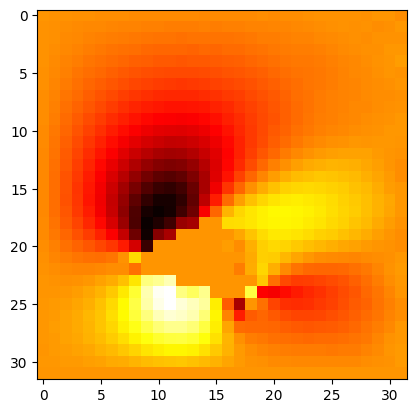

In [4]:
data = clean_verticals[55].values.tolist()
data = np.array(data).astype(float)
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

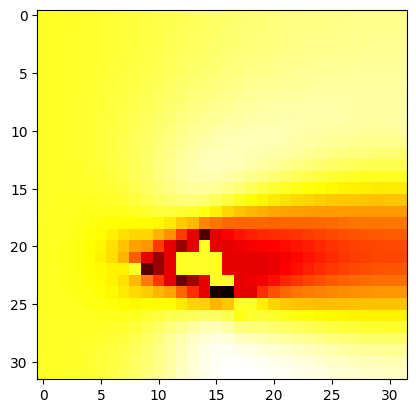

In [5]:
data = clean_horizontals[55].values.tolist()
data = np.array(data).astype(float)
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

In [22]:
def create_signed_distance_field(shape_array):
    # Create a mask for the inside and outside of the shape
    inside_mask = shape_array == -1
    outside_mask = shape_array == 0

    # Compute the distance transform for both the inside and outside
    distance_inside = distance_transform_edt(inside_mask)
    distance_outside = distance_transform_edt(outside_mask)

    # Create the signed distance field
    signed_distance_field = distance_outside - distance_inside

    # Normalize the signed distance field
    max_distance = np.max(np.abs(signed_distance_field))
    if max_distance > 0:
        signed_distance_field = signed_distance_field / max_distance

    # Set the values inside the original shape to 0
    signed_distance_field[inside_mask] = 0

    return signed_distance_field

sdf_shapes = []
for shape in clean_shapes:
    signed_distance_field = create_signed_distance_field(shape.astype(float))
    sdf_shapes.append(signed_distance_field)

print(sdf_shapes[55].tolist())

[[0.9363884550419331, 0.9189169863904046, 0.9002070714423868, 0.8829374871183311, 0.864386311379257, 0.8463861589037196, 0.8299499115932519, 0.8151721735985596, 0.8021446132406883, 0.79095371519363, 0.7816783671639239, 0.774387403623929, 0.7691372589965078, 0.7659698992439663, 0.7649111981170508, 0.7649111981170508, 0.7659698992439663, 0.7691372589965078, 0.774387403623929, 0.7816783671639239, 0.79095371519363, 0.8021446132406883, 0.8151721735985596, 0.8299499115932519, 0.8463861589037196, 0.864386311379257, 0.8838548250147095, 0.9046969101249474, 0.9268199057871874, 0.9501343417764745, 0.9745547127629918, 1.0], [0.9002070714423868, 0.8829374871183311, 0.864386311379257, 0.8463861589037196, 0.8289729248960408, 0.810186364298148, 0.7930001706585601, 0.7775204740199831, 0.7638510296267934, 0.7520905493951278, 0.7423297680969808, 0.7346483960387233, 0.7291121574130556, 0.7257701436809528, 0.7246527140056271, 0.7246527140056271, 0.7257701436809528, 0.7291121574130556, 0.7346483960387233, 0

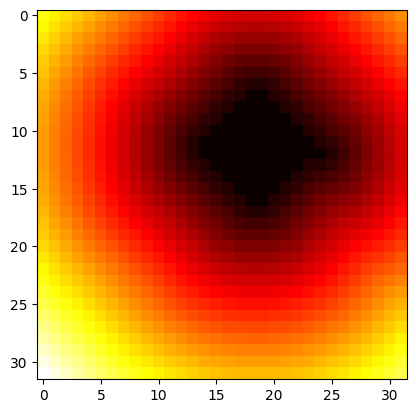

In [25]:
shape_data = sdf_shapes[221].tolist()
shape_data = np.array(shape_data).astype(float)
plt.imshow(shape_data, cmap='hot', interpolation='nearest')
plt.show()